# Проект SQL "Анализ сервиса книг по подписке"

**Цель исследования:**

Сформулировать ценностное предложение для нового продукта, проанализировав базу данных.

**Задачи:**
- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

**Описание данных:**

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

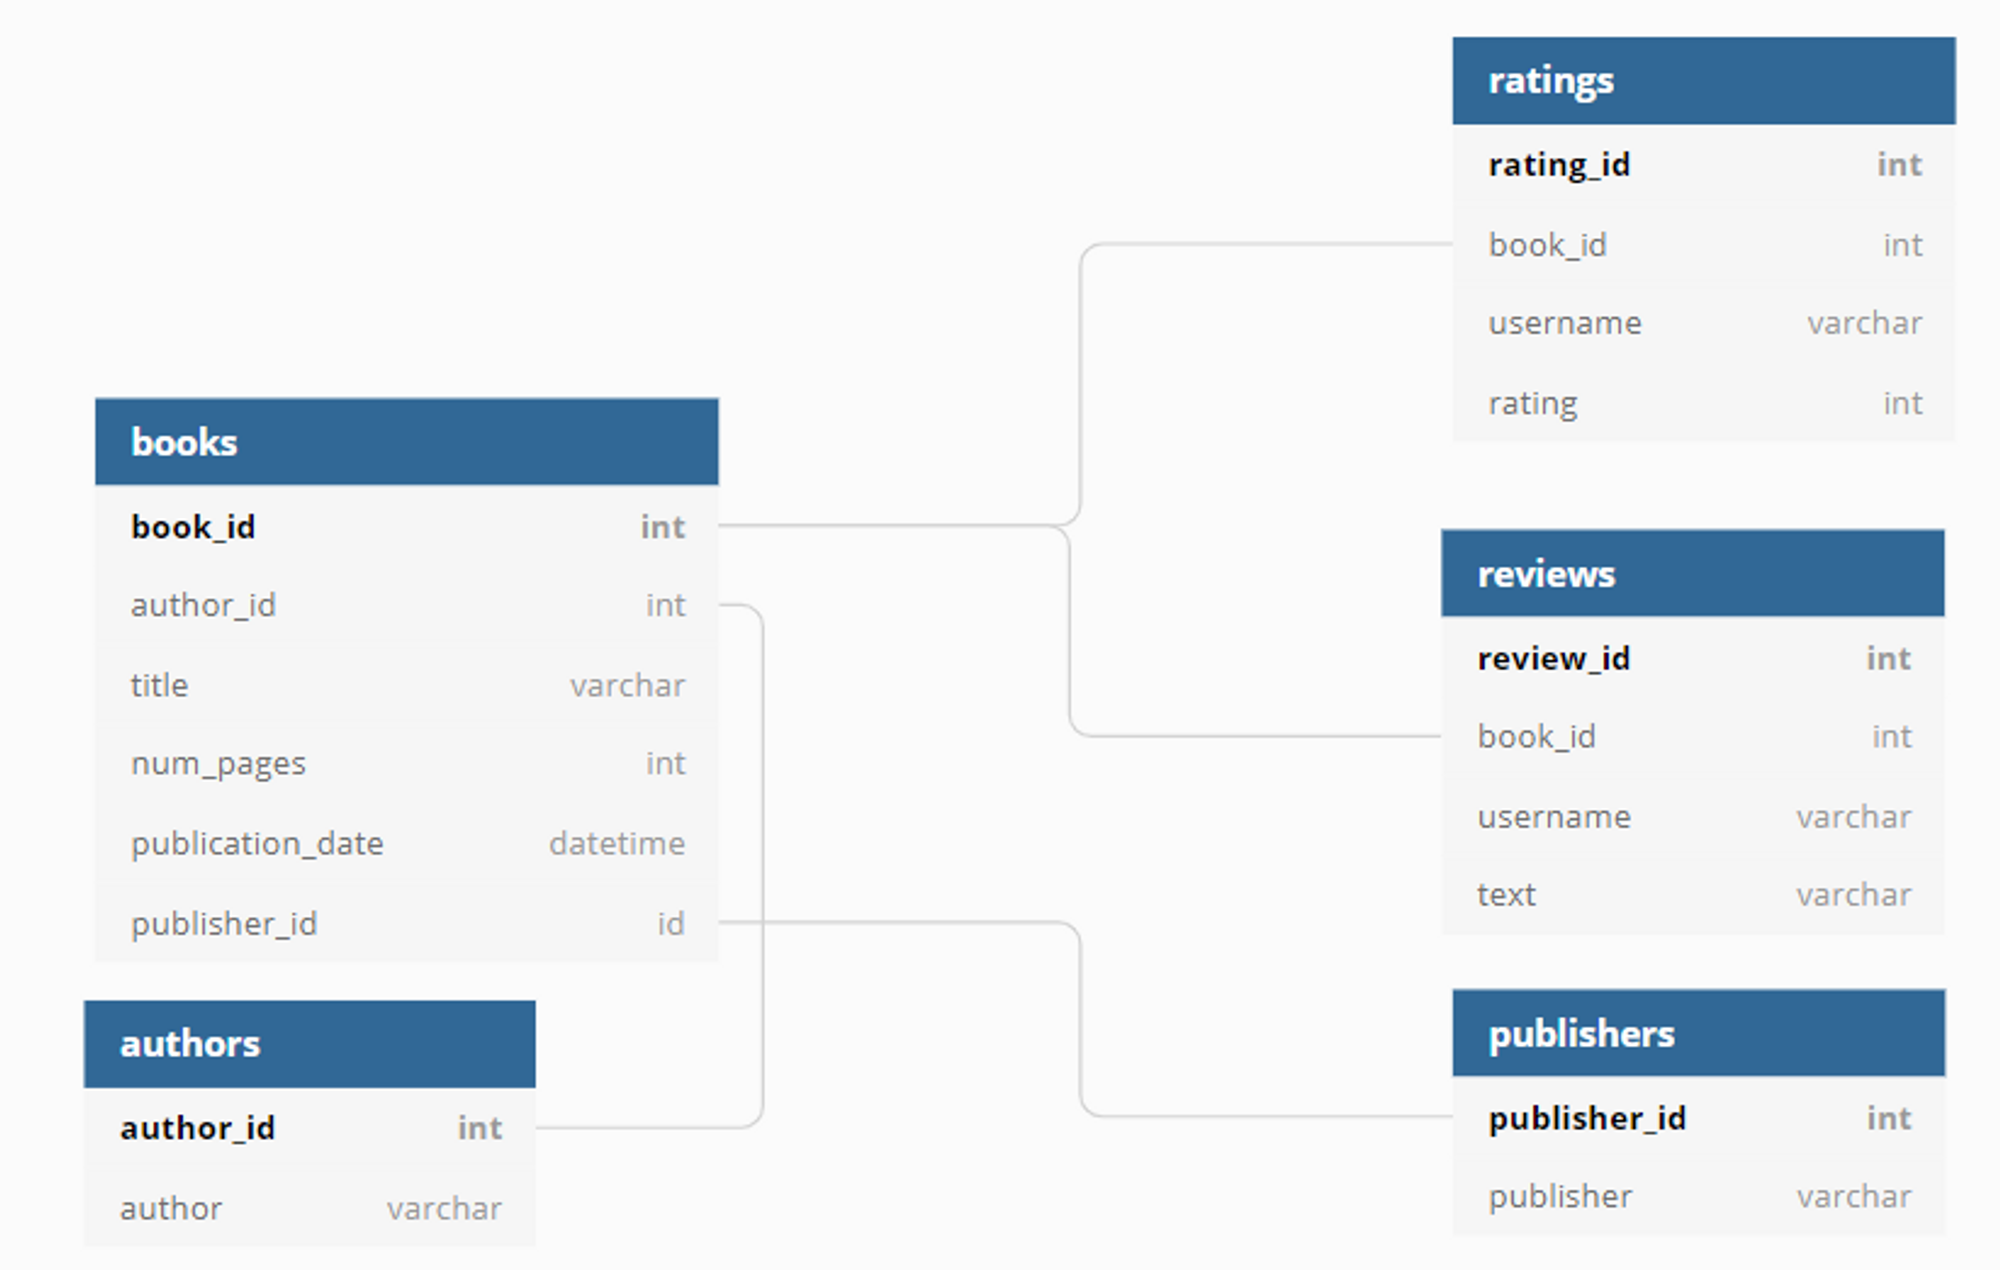

# Исследование таблиц

In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:

# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})



In [3]:
query = '''
SELECT *
FROM books
LIMIT 10
'''
pd.io.sql.read_sql(query, con = engine)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
5,6,257,1st to Die (Women's Murder Club #1),424,2005-05-20,116
6,7,258,2nd Chance (Women's Murder Club #2),400,2005-05-20,116
7,8,260,4th of July (Women's Murder Club #4),448,2006-06-01,318
8,9,563,A Beautiful Mind,461,2002-02-04,104
9,10,445,A Bend in the Road,341,2005-04-01,116


In [4]:
query = '''
SELECT *
FROM authors
LIMIT 10
'''
pd.io.sql.read_sql(query, con = engine)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
5,6,Alan Paton
6,7,Albert Camus/Justin O'Brien
7,8,Aldous Huxley
8,9,Aldous Huxley/Christopher Hitchens
9,10,Aleksandr Solzhenitsyn/H.T. Willetts


In [5]:
query = '''
SELECT *
FROM publishers
LIMIT 10
'''
pd.io.sql.read_sql(query, con = engine)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company
5,6,Aladdin
6,7,Aladdin Paperbacks
7,8,Albin Michel
8,9,Alfred A. Knopf
9,10,Alfred A. Knopf Books for Young Readers


In [6]:
query = '''
SELECT *
FROM ratings
LIMIT 10
'''
pd.io.sql.read_sql(query, con = engine)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2
5,6,3,johnsonamanda,4
6,7,3,scotttamara,5
7,8,3,lesliegibbs,5
8,9,4,abbottjames,5
9,10,4,valenciaanne,4


In [7]:
query = '''
SELECT *
FROM reviews
LIMIT 10
'''
pd.io.sql.read_sql(query, con = engine)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...
5,6,3,lesliegibbs,Analysis no several cause international.
6,7,4,valenciaanne,One there cost another. Say type save. With pe...
7,8,4,abbottjames,Within enough mother. There at system full rec...
8,9,5,npowers,Thank now focus realize economy focus fly. Ite...
9,10,5,staylor,Game push lot reduce where remember. Including...


Проверим есть ли в таблицах пропуски или дубликаты

# Решение задач

**1) Посчитайте, сколько книг вышло после 1 января 2000 года**

In [9]:
query = '''
SELECT COUNT(book_id)
FROM books
WHERE publication_date > '2000-01-01'
'''
pd.io.sql.read_sql(query, con = engine)

,count
0,819


819 книг вышло после 1 января 2000 года.

**2) Для каждой книги посчитайте количество обзоров и среднюю оценку** 

In [13]:
query = '''
SELECT b.title, 
    COUNT(DISTINCT(re.review_id)) AS count_review ,
    ROUND(AVG(rt.rating), 2) AS avg_rating
FROM books AS b
FULL OUTER JOIN ratings  AS rt ON rt.book_id = b.book_id
FULL OUTER JOIN reviews AS re ON re.book_id = b.book_id
GROUP BY b.book_id
ORDER BY count_review DESC, avg_rating DESC
'''
pd.io.sql.read_sql(query, con = engine)

,title,count_review,avg_rating
0,Twilight (Twilight #1),7,3.66
1,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.41
2,Harry Potter and the Chamber of Secrets (Harry...,6,4.29
3,The Book Thief,6,4.26
4,The Glass Castle,6,4.21
...,...,...,...
995,Disney's Beauty and the Beast (A Little Golden...,0,4.00
996,Leonardo's Notebooks,0,4.00
997,Essential Tales and Poems,0,4.00
998,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.67


В данных имеются книги как с высокой так и низкой оценкой, самой популярной книгой среди комментаторов стала Twilight (Twilight #1).

**3) Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры**

In [15]:
query = '''
SELECT p.publisher,
        COUNT(b.book_id)
FROM publishers AS p
FULL OUTER JOIN books AS b ON p.publisher_id = b.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher
ORDER BY COUNT(b.book_id) DESC
LIMIT 1
'''
pd.io.sql.read_sql(query, con = engine)

,publisher,count
0,Penguin Books,42


Издательство Penguin Books выпустило больше всего книг - 42 штуки.

**4) Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками**

In [16]:
query = '''
WITH 
cr AS (SELECT book_id,
            COUNT(rating_id) AS count_rating
        FROM ratings
        GROUP BY book_id)
        
SELECT a.author,
        AVG(r.rating)
FROM authors AS a
FULL OUTER JOIN books AS b ON a.author_id = b.author_id
FULL OUTER JOIN cr ON cr.book_id = b.book_id
RIGHT OUTER JOIN ratings AS r ON cr.book_id = r.book_id
WHERE cr.count_rating >= 50
GROUP BY a.author
ORDER BY AVG(r.rating) DESC
LIMIT 1
'''
pd.io.sql.read_sql(query, con = engine)

,author,avg
0,J.K. Rowling/Mary GrandPré,4.287097


Автор с самой высокой средней оценкой книг J.K. Rowling/Mary GrandPré, его средняя оценка составила 4.287

**5) Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок**

In [17]:
query = '''
WITH
f AS (SELECT username,
            COUNT(review_id) AS count_review
    FROM reviews
    GROUP BY username)

SELECT ROUND(AVG(count_review))
FROM f 
WHERE username IN (SELECT username
        FROM ratings
        GROUP BY username
        HAVING COUNT(rating_id) > 50)
'''
pd.io.sql.read_sql(query, con = engine)

,round
0,24.0


 Cреднее количество обзоров от пользователей, которые поставили больше 50 оценок составило 24 штуки.

# Выводы:

- в сервисе представленны данные о 1000 книг
- 819 из них были выпущены за последние 23 года 
- в данных имеются книги как с высокой так и низкой оценкой, самой популярной книгой среди комментаторов стала Twilight (Twilight #1)
- больше всего книг выпущено издательством Penguin Books - 43 книги
- J.K. Rowling/Mary GrandPré, - автор с самой высокой оценкой - 4.287
- среднее количество обзоров от пользователей, которые поставили больше 50 оценок на сервисе 24 обзора.